In [158]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from tqdm import tqdm

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
# 한글 폰트 설정
import matplotlib
import matplotlib.font_manager as fm

# C:\Windows\Fonts   # ==> OS에 등록되어 있는 모든 폰트 파일들
font_path = 'C:\\Windows\\Fonts\\H2GTRM.TTF' # 윈도우 OS 폰트 경로

font_prop = fm.FontProperties(fname = font_path) # 폰트경로에 있는 폰트 이름들 뽑아오자.


font_name = font_prop.get_name() # 폰트명

#matplotlib.rc('font', key=value)
matplotlib.rc('font', family=font_name)

# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
# -> 아스키코드의 마이너스 사용
plt.rc('axes', unicode_minus=False) # matplotlib의 기본적인 유니코드 minus폰트사용 중지

In [137]:
train = pd.read_csv('../data/train.csv')
train.head(3)

,item_id,year,month,seq,type,hs4,weight,quantity,value
0,DEWLVASR,2022,1,1.00,1,3038,14858.00,0.00,32688.00
1,ELQGMQWE,2022,1,1.00,1,2002,62195.00,0.00,110617.00
2,AHMDUILJ,2022,1,1.00,1,2102,18426.00,0.00,72766.00


## item별 월별 구매횟수

In [138]:
pd.pivot_table(train, index='item_id', columns="month", values='seq',aggfunc='count', margins=True, margins_name="seq_total")


month,1,2,3,4,5,6,7,8,9,10,11,12,seq_total
item_id,,,,,,,,,,,,,
AANGBULD,5.00,8.00,5.00,3.00,4.00,7.00,5.00,4.00,3.00,4.00,3.00,5.00,56
AHMDUILJ,12.00,12.00,12.00,12.00,12.00,12.00,12.00,9.00,9.00,9.00,9.00,9.00,129
ANWUJOKX,3.00,NaN,NaN,3.00,3.00,1.00,2.00,1.00,NaN,2.00,NaN,3.00,18
APQGTRMF,12.00,11.00,10.00,11.00,12.00,11.00,12.00,7.00,9.00,7.00,8.00,5.00,115
ATLDMDBO,12.00,12.00,11.00,12.00,12.00,11.00,11.00,9.00,9.00,9.00,8.00,9.00,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZCELVYQU,10.00,10.00,9.00,12.00,10.00,11.00,11.00,3.00,7.00,6.00,7.00,9.00,105
ZGJXVMNI,12.00,12.00,12.00,12.00,12.00,12.00,12.00,9.00,9.00,9.00,9.00,9.00,129
ZKENOUDA,11.00,12.00,12.00,12.00,12.00,12.00,12.00,9.00,9.00,8.00,9.00,8.00,126


## seq 분류

In [139]:
seq_pivot_df_cnt = pd.pivot_table(train, index='item_id', columns="month", values='seq',aggfunc='count', margins=True, margins_name="seq_total")

tmp_ser = seq_pivot_df_cnt['seq_total'].iloc[:-1]
dct_seq_total = pd.cut(tmp_ser, bins= [0, 40, 80, tmp_ser.max()], labels = ['seq_cnt_low',  'seq_cnt_mid',  'seq_cnt_high'] ).to_dict()
dct_seq_total

train_fe = train.copy()
train_fe['seq_cat'] = train_fe["item_id"].map(dct_seq_total)

count : [ 4.  1.  4.  0.  0.  0.  0.  1.  2.  3.  3.  1.  0.  1.  3.  1.  2.  5.
  4. 65.]
bins : [  2.     8.35  14.7   21.05  27.4   33.75  40.1   46.45  52.8   59.15
  65.5   71.85  78.2   84.55  90.9   97.25 103.6  109.95 116.3  122.65
 129.  ]
container : <BarContainer object of 20 artists>
2.0 ~ 8.35 : 4개
8.35 ~ 14.7 : 1개
14.7 ~ 21.049999999999997 : 4개
21.049999999999997 ~ 27.4 : 0개
27.4 ~ 33.75 : 0개
33.75 ~ 40.099999999999994 : 0개
40.099999999999994 ~ 46.449999999999996 : 0개
46.449999999999996 ~ 52.8 : 1개


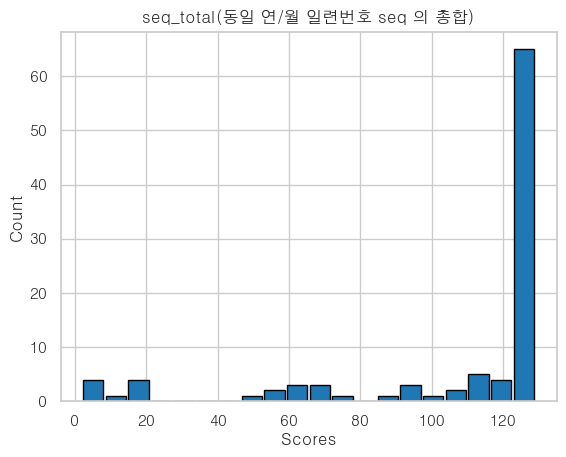

In [140]:
# (최대값 - 최소값) / bins
# plt.hist(scores, bins =10) # bins = 10, 기본값
count, bins, container = plt.hist(seq_pivot_df_cnt['seq_total'].iloc[:-1], bins=20, edgecolor='k', rwidth=.9) # 
print('count :', count) # count : [    1.   2.   1.     3.   3.     3.   2.     5.]
print('bins :', bins)   # bins :  [60. 64.25 68.5  72.75 77.   81.25 85.5  89.75 94.  ]
print('container :', container) # container : <BarContainer object of 8 artists>


for i in range(8):
    print(f'{bins[i]} ~ {bins[i+1]} : {int(count[i])}개')

plt.xlabel('Scores')
plt.ylabel('Count')

plt.title("seq_total(동일 연/월 일련번호 seq 의 총합)")
plt.show()


## seq : FacetGrid

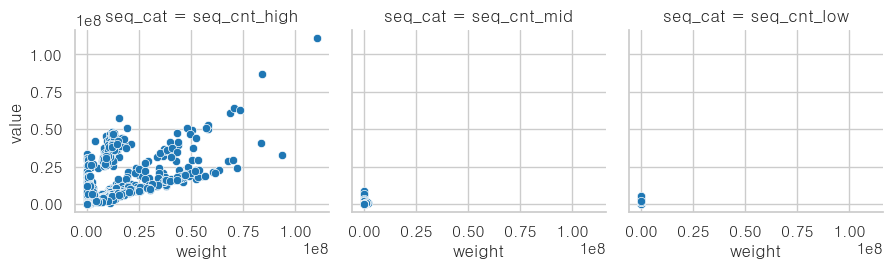

In [141]:
facet_grid = sns.FacetGrid(
    data=train_fe,# row='seq_cat', 
    col='seq_cat', 
    margin_titles=True)

facet_grid.map(sns.scatterplot, 'weight', 'value')
plt.show()

## Manual Cluster

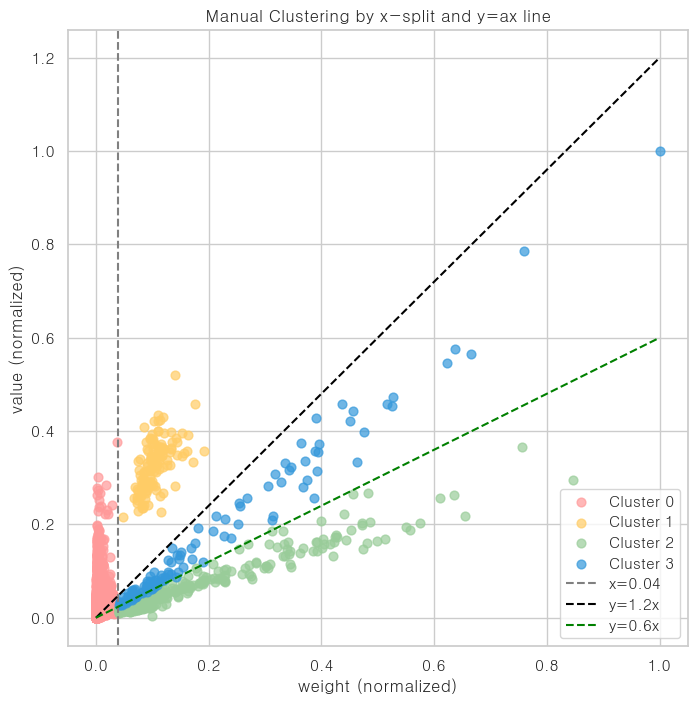

In [142]:
import numpy as np
import matplotlib.pyplot as plt

# 최대 weight 값 기준 정규화 (0~1 범위로 맞추면 시각화 깔끔)
x = train_fe['weight'] / train_fe['weight'].max()
y = train_fe['value'] / train_fe['value'].max()

# 기준선 설정
x_split = 0.04     # x=0.3 경계선
a = 1.2            # y = a*x 기준선 (기울기)
b = 0.6            # y = b*x 기준선 (기울기)
train_fe['cluster_manual'] = 0  # 기본값


#plt.imshow((x > x_split) & (y > a * x))



# 조건별 군집 분류
train_fe.loc[(x <= x_split), 'cluster_manual'] = 0 # 분홍색 군집
train_fe.loc[(x > x_split) & (y > a * x), 'cluster_manual'] = 1 # 노란색 군집
train_fe.loc[(x > x_split) & (y <= a * x), 'cluster_manual'] = 2 # 초록색 군집
train_fe.loc[(x > x_split) & (y <= a * x) & (y >= b * x), 'cluster_manual'] = 3 # 파란색 군집
############################################################################
# 시각화
plt.figure(figsize=(8,8))
colors = ['#FF9999','#FFCC66','#99CC99', '#3498db']
for i, color in enumerate(colors):
    plt.scatter(x[train_fe['cluster_manual']==i],
                y[train_fe['cluster_manual']==i],
                label=f'Cluster {i}', s=40, color=color, alpha=0.7)


# 기준선들 시각화
plt.axvline(x=x_split, color='gray', linestyle='--', label=f'x={x_split}')
plt.plot(np.linspace(0,1,100),
         a * np.linspace(0,1,100),
         color='black', linestyle='--', label=f'y={a}x')
plt.plot(np.linspace(0,1,100),
         b * np.linspace(0,1,100),
         color='green', linestyle='--', label=f'y={b}x')

plt.xlabel('weight (normalized)')
plt.ylabel('value (normalized)')
plt.title('Manual Clustering by x-split and y=ax line')
plt.legend()
plt.show()


In [143]:
train_fe.head()

,item_id,year,month,seq,type,hs4,weight,quantity,value,seq_cat,cluster_manual
0,DEWLVASR,2022,1,1.00,1,3038,14858.00,0.00,32688.00,seq_cnt_high,0
1,ELQGMQWE,2022,1,1.00,1,2002,62195.00,0.00,110617.00,seq_cnt_high,0
2,AHMDUILJ,2022,1,1.00,1,2102,18426.00,0.00,72766.00,seq_cnt_high,0
3,XIPPENFQ,2022,1,1.00,1,2501,20426.00,0.00,11172.00,seq_cnt_high,0
4,FTSVTTSR,2022,1,1.00,1,2529,248000.00,0.00,143004.00,seq_cnt_high,0


## Manual Cluster : FacetGrid(1)

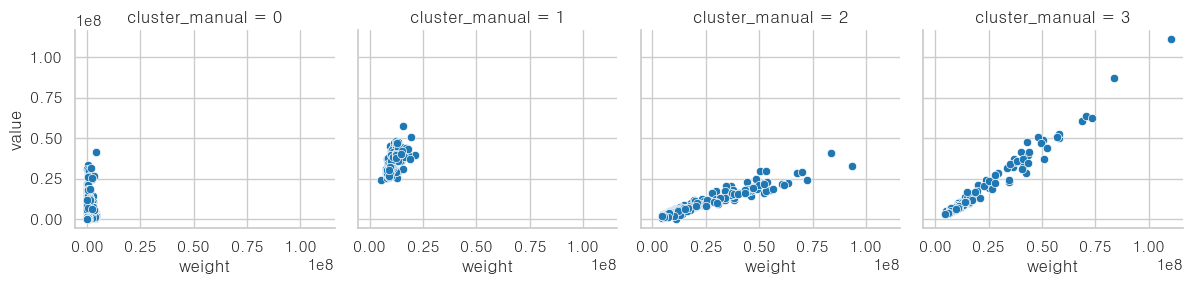

In [144]:
facet_grid = sns.FacetGrid(
    data=train_fe,# row='seq_cat', 
    col='cluster_manual', 
    margin_titles=True)

facet_grid.map(sns.scatterplot, 'weight', 'value')
plt.show()

## Manual Cluster : FacetGrid(2)

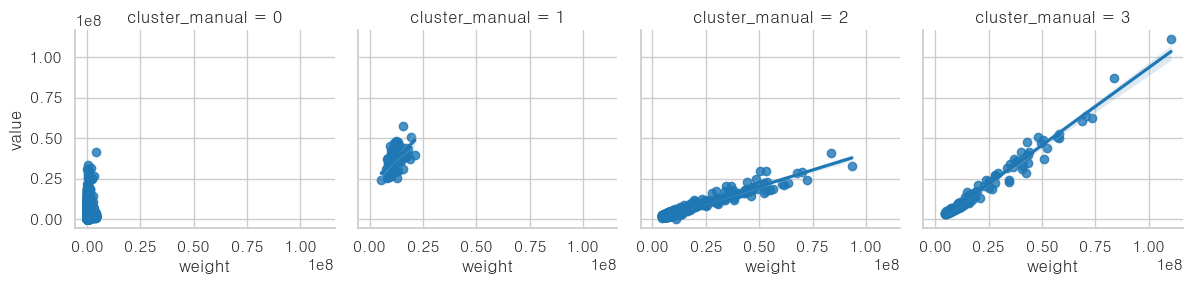

In [145]:
facet_grid = sns.FacetGrid(
    data=train_fe,# row='seq_cat', 
    col='cluster_manual', 
    margin_titles=True)

facet_grid.map(sns.regplot, 'weight', 'value')
plt.show()

## Manual Cluster : FacetGrid(3)

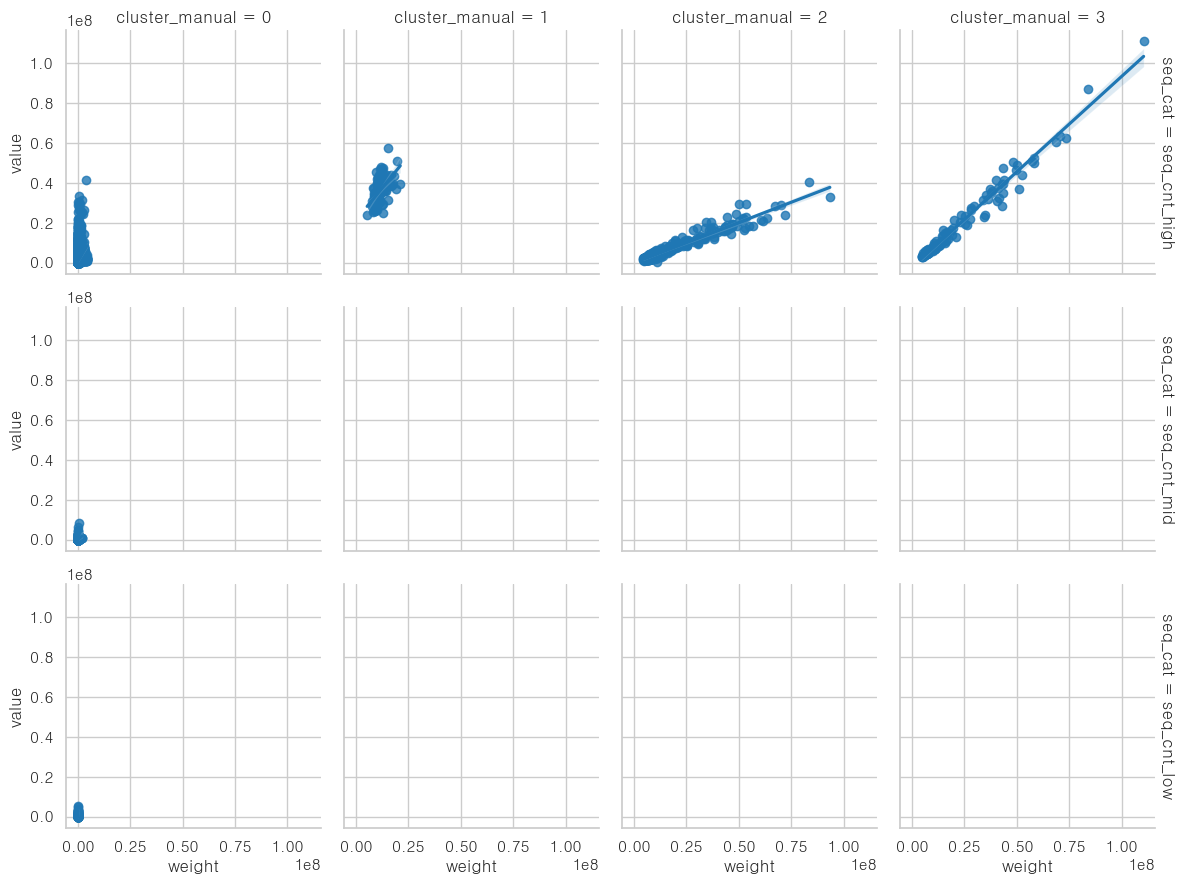

In [146]:
facet_grid = sns.FacetGrid(
    data=train_fe,
    row='seq_cat', 
    col='cluster_manual', 
    margin_titles=True)

facet_grid.map(sns.regplot, 'weight', 'value')
plt.show()

In [147]:
display(train.head(3))
display(train_fe.head(3))

,item_id,year,month,seq,type,hs4,weight,quantity,value
0,DEWLVASR,2022,1,1.00,1,3038,14858.00,0.00,32688.00
1,ELQGMQWE,2022,1,1.00,1,2002,62195.00,0.00,110617.00
2,AHMDUILJ,2022,1,1.00,1,2102,18426.00,0.00,72766.00


,item_id,year,month,seq,type,hs4,weight,quantity,value,seq_cat,cluster_manual
0,DEWLVASR,2022,1,1.00,1,3038,14858.00,0.00,32688.00,seq_cnt_high,0
1,ELQGMQWE,2022,1,1.00,1,2002,62195.00,0.00,110617.00,seq_cnt_high,0
2,AHMDUILJ,2022,1,1.00,1,2102,18426.00,0.00,72766.00,seq_cnt_high,0


In [148]:
# 각 열의 고유값 개수
display(train.apply(lambda x: len(np.unique(x)), axis=0))

# 각 열의 고유값 목록
display(train.apply(lambda x: np.unique(x), axis=0))


item_id      100
year           4
month         12
seq            3
type           1
hs4           71
weight      7438
quantity    1226
value       9686
dtype: int64

item_id     [AANGBULD, AHMDUILJ, ANWUJ...
year             [2022, 2023, 2024, 2025]
month       [1, 2, 3, 4, 5, 6, 7, 8, 9...
seq                       [1.0, 2.0, 3.0]
type                                  [1]
hs4         [1210, 2002, 2102, 2501, 2...
weight      [0.0, 1.0, 2.0, 3.0, 4.0, ...
quantity    [0.0, 1.0, 2.0, 3.0, 4.0, ...
value       [0.0, 1.0, 2.0, 3.0, 4.0, ...
dtype: object

In [149]:
# pivot table: item_id × month → 총 무역량
pivot = train.pivot_table(
    index='item_id',
    columns='month',
    values='value',
    aggfunc='sum',
    fill_value=0
)
display(pivot.head())


month,1,2,3,4,5,6,7,8,9,10,11,12
item_id,,,,,,,,,,,,
AANGBULD,66612.00,145742.00,92593.00,353766.00,53521.00,744177.00,667253.00,506469.00,313076.00,456613.00,144547.00,68392.00
AHMDUILJ,621515.00,432203.00,605674.00,465735.00,327894.00,555698.00,367213.00,487565.00,530652.00,353700.00,411116.00,294674.00
ANWUJOKX,27980.00,0.00,0.00,63580.00,81670.00,26424.00,8470.00,28731.00,0.00,80475.00,0.00,32979.00
APQGTRMF,779279.00,997028.00,543639.00,1087719.00,1083203.00,1188941.00,1440510.00,545487.00,918163.00,1018541.00,630985.00,826455.00
ATLDMDBO,355882710.00,234896124.00,247203736.00,230100939.00,226964089.00,179639568.00,280963874.00,163002448.00,129058600.00,200139698.00,152949137.00,179085930.00


In [150]:
train.groupby('item_id')['value'].describe()


,count,mean,std,min,25%,50%,75%,max
item_id,,,,,,,,
AANGBULD,56.00,64513.59,112471.58,0.00,0.00,25985.50,52647.50,533478.00
AHMDUILJ,129.00,42276.27,36519.50,3531.00,9612.00,26080.00,68096.00,153608.00
ANWUJOKX,18.00,19461.61,21560.06,0.00,0.00,17447.00,28620.00,63580.00
APQGTRMF,115.00,96173.48,121837.73,0.00,0.00,13037.00,173708.50,502659.00
ATLDMDBO,125.00,20639094.82,17469493.85,128.00,8836150.00,16627788.00,24199054.00,111041383.00
...,...,...,...,...,...,...,...,...
YSYHGLQK,98.00,977.94,1844.92,0.00,0.00,362.00,851.00,10651.00
ZCELVYQU,105.00,81333.65,197894.87,0.00,22.00,3458.00,45792.00,1187539.00
ZGJXVMNI,129.00,752091.05,367636.25,4572.00,498655.00,645665.00,948859.00,2069252.00


## 월별 총 무역량 추이 (1)

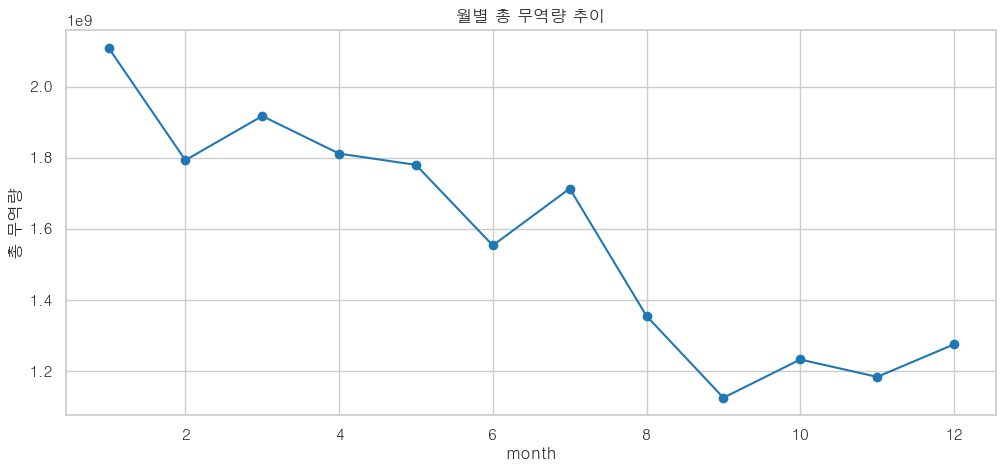

In [151]:
monthly_sum = train.groupby('month')['value'].sum()
monthly_sum.plot(kind='line', marker='o', figsize=(12,5), title='월별 총 무역량 추이')
plt.ylabel('총 무역량')
plt.show()


## 월별 총 무역량 추이 (2)

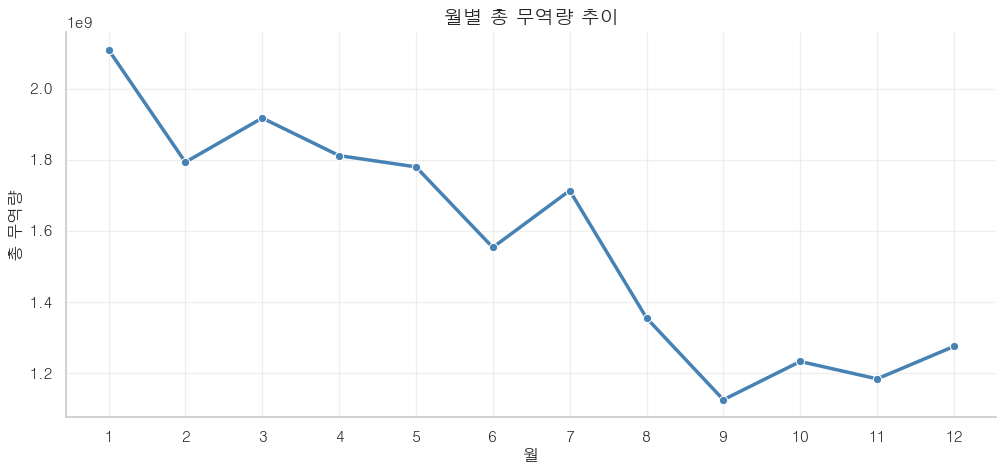

In [ ]:

# 월별 총 무역량 집계
monthly_sum = (
    train.groupby('month')['value']
    .sum()
    .reset_index()
    .sort_values('month')
)

# seaborn lineplot
plt.figure(figsize=(12,5))
sns.lineplot(
    data=monthly_sum,
    x='month',
    y='value',
    marker='o',
    linewidth=2.5,
    color='steelblue'
)

plt.title('월별 총 무역량 추이', fontsize=14)
plt.xlabel('월', fontsize=12)
plt.ylabel('총 무역량', fontsize=12)
plt.xticks(range(1, 13))  # 1~12월 표시
plt.grid(True, alpha=0.3)
sns.despine()  # 윗줄/오른쪽 테두리 제거
plt.show()

## 년도별 총 무역량 추이 

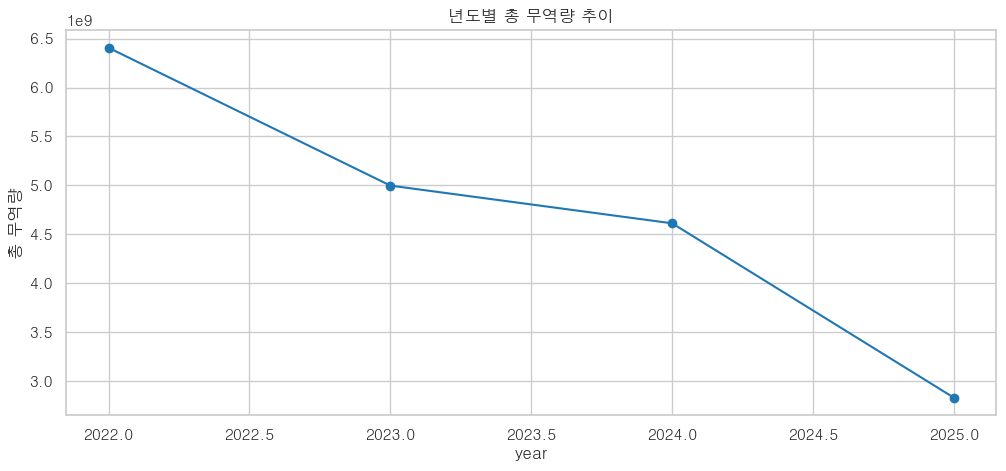

In [153]:
yearly_sum = train.groupby('year')['value'].sum()
yearly_sum.plot(kind='line', marker='o', figsize=(12,5), title='년도별 총 무역량 추이')
plt.ylabel('총 무역량')
plt.show()

## 2022~2025년 월별 총 무역량 추이

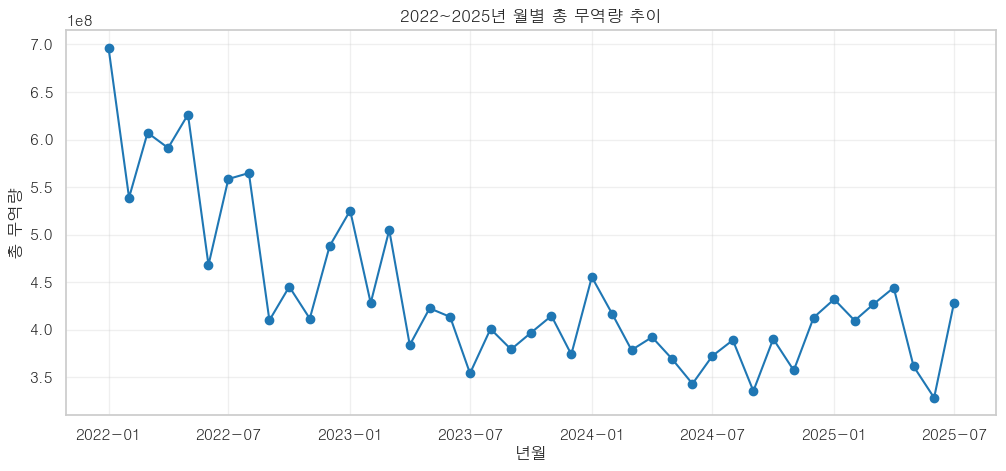

In [157]:
# 연도/월별 합계 계산
monthly_sum = train.groupby(['year', 'month'])['value'].sum().reset_index()

# datetime 변환
monthly_sum['ym'] = pd.to_datetime(
    monthly_sum['year'].astype(str) + '-' + monthly_sum['month'].astype(str) + '-01'
)

# 전체 기간 추이
plt.figure(figsize=(12,5))
plt.plot(monthly_sum['ym'], monthly_sum['value'], marker='o')
plt.title('2022~2025년 월별 총 무역량 추이')
plt.xlabel('년월')
plt.ylabel('총 무역량')
plt.grid(True, alpha=0.3)
plt.show()


## 총 무역량 상위 10개 품목

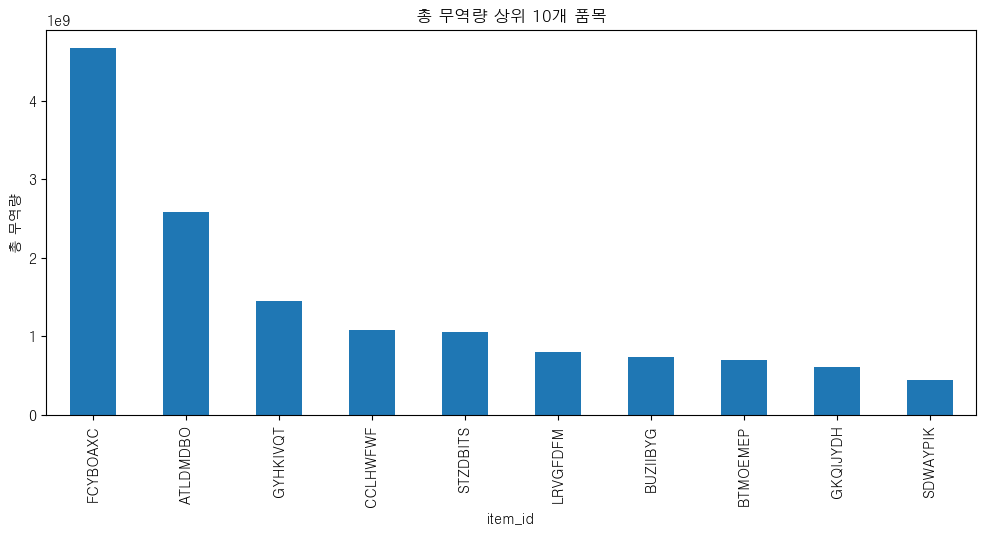

In [ ]:
top_items = train.groupby('item_id')['value'].sum().sort_values(ascending=False).head(10)
top_items.plot(kind='bar', figsize=(12,5), title='총 무역량 상위 10개 품목')
plt.ylabel('총 무역량')
plt.show()


##  품목간 상관관계 히트맵

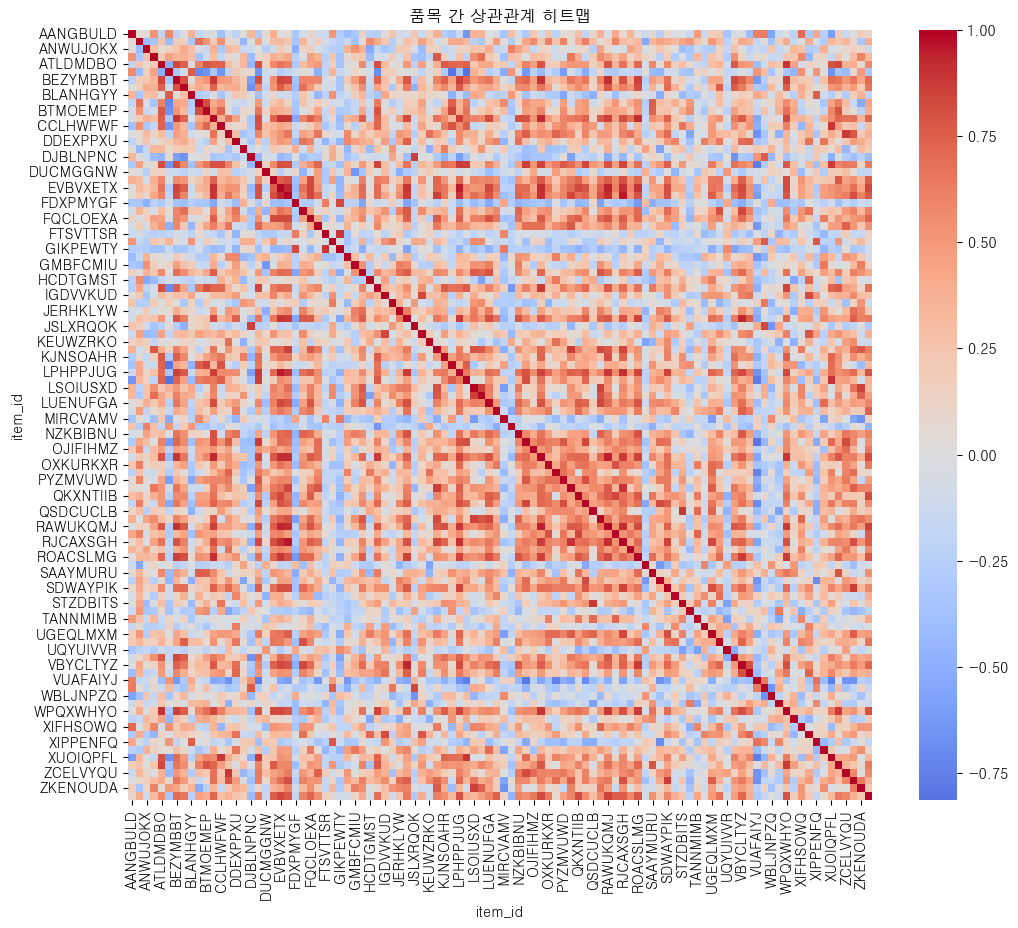

In [ ]:


corr_matrix = pivot.T.corr()  # item_id 간 상관계수
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('품목 간 상관관계 히트맵')
plt.show()


## HS4별 평균,합계,중앙값 등 요약통계

In [ ]:

# hs4별 평균, 합계, 중앙값 등 요약 통계
pd.set_option('display.float_format', '{:.2f}'.format)
hs4_code = pd.read_csv('../data/hs4_code.csv')

hs4_stats = hs4_code.groupby('hs4')['value'].agg(['count', 'mean', 'sum', 'median']).round(2).sort_values('sum', ascending=False)

print(hs4_stats.head(71))

# # hs4 기준으로 조인
# train['hs4'] = train['hs4'].astype(str).str.strip()
# hs4_code['hs4'] = hs4_code['hs4'].astype(str).str.strip()

# train_merged = pd.merge(train, hs4_code, on='hs4', how='left')

# # 'hs4_name' 컬럼에서 빈칸('')을 표준 결측치(NaN)로 변환
# train_merged['hs4_name'] = train_merged['hs4_name'].replace('', np.nan)

# NaN으로 변환된 후, 필요한 경우 특정 값으로 대체 가능 (예: '분류불가')
hs4_code['hs4_name'] = hs4_code['hs4_name'].fillna('[분류불가]')

# 확인
print(hs4_code.head())


      count        mean           sum      median
hs4                                              
3824    535  8872138.21 4746593943.00   264415.00
2814    125 20639094.82 2579886853.00 16627788.00
8505    387  4055635.50 1569530939.00   696303.00
3102    257  5871646.19 1509013070.00  4146240.00
3815    310  3864737.86 1198068738.00  1715967.50
...     ...         ...           ...         ...
3024      5     1077.00       5385.00     1139.00
4302      9      482.00       4338.00       26.00
2710     20      139.65       2793.00        2.50
3003      2      565.00       1130.00      565.00
2612      6       46.33        278.00       14.00

[71 rows x 4 columns]
    item_id  year  month  seq  type   hs4    weight  quantity     value  \
0  DEWLVASR  2022      1 1.00     1  3038  14858.00      0.00  32688.00   
1  ELQGMQWE  2022      1 1.00     1  2002  62195.00      0.00 110617.00   
2  AHMDUILJ  2022      1 1.00     1  2102  18426.00      0.00  72766.00   
3  XIPPENFQ  2022      1 1.

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

pd.set_option('display.colheader_justify', 'left')  # 헤더 좌측 정렬
pd.set_option('display.width', 120)  # 출력 폭 조절
pd.set_option('display.max_colwidth', 30)  # 최대 표시 길이 조정

hs4_stats = (
    hs4_code
    .groupby(['hs4', 'hs4_name'])['value']
    .agg(['count', 'mean', 'sum', 'median'])
    .round(2)
    .sort_values('sum', ascending=False)
)

hs4_code['hs4_name'] = (
    hs4_code['hs4_name']
    .fillna('')          # NaN → 빈 문자열
    .astype(str)          # 문자열로 변환
    .str.strip()          # 앞뒤 공백 제거
    .str.slice(0, 30)     # 앞에서 25자만 남기기
)

display(hs4_stats.head(30))


,,count,mean,sum,median
hs4,hs4_name,,,,
3824,조제점결제 (주물 주형용.코,535,8872138.21,4746593943.00,264415.00
2814,"무수(無水)암모니아, 암모니",125,20639094.82,2579886853.00,16627788.00
8505,"전자석, 영구자석, 척.클램",387,4055635.50,1569530939.00,696303.00
3102,질소비료,257,5871646.19,1509013070.00,4146240.00
3815,"반응시작제, 반응촉진제, 촉",310,3864737.86,1198068738.00,1715967.50
6211,트랙슈트·스키슈트·수영복 (,129,8387578.77,1081997661.00,7468294.00
8501,전동기.발전기 (발전세트 제,423,2177070.76,920900932.00,880215.00
9403,가구 (사무실용.주방용.침실,129,5739657.26,740415787.00,5732751.00
2811,"기타 무기산, 무기 비(非)",516,1434379.17,740139653.00,794111.50


## Top 10 HS4 Codes by Trade Value

C:\Users\tj\AppData\Local\Temp\ipykernel_1864\3357856682.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hs4_summary_top.values, y=hs4_summary_top.index, palette="magma")


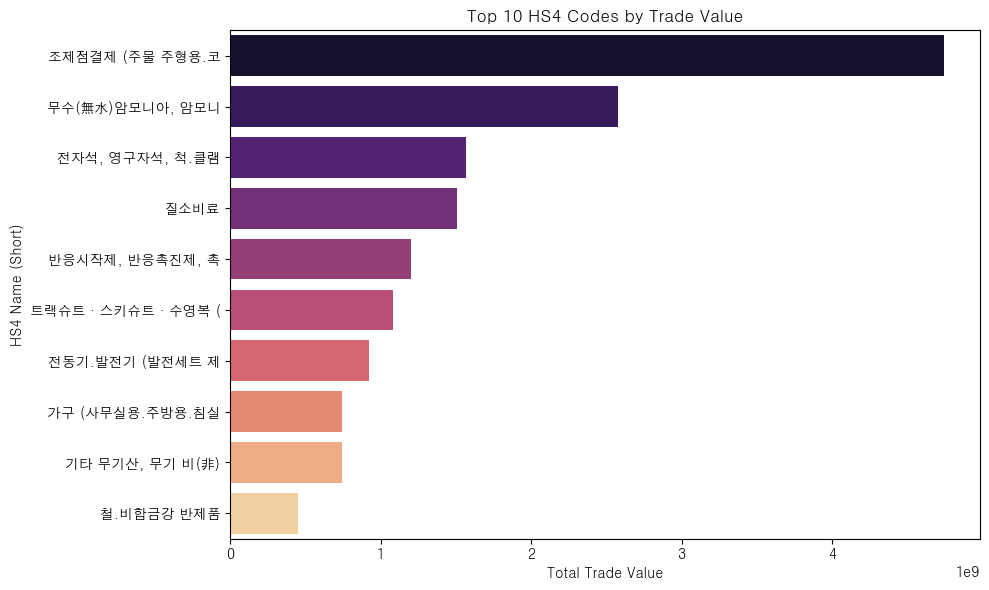

In [ ]:

# NaN 처리 + 최대 15자 자르기
hs4_code['hs4_name_short'] = (
    hs4_code['hs4_name']
    .fillna('Unknown HS4')
    .astype(str)
    .str.strip()
    .str.slice(0, 15)
)

hs4_summary = (
    hs4_code.groupby('hs4_name_short')['value']
    .sum()
    .sort_values(ascending=False)  # 내림차순
)

# plt.figure(figsize=(10, 8))
# sns.barplot(x=hs4_summary.values, y=hs4_summary.index, palette="viridis")
# plt.xlabel("Total Trade Value")
# plt.ylabel("HS4 Name (Short)")
# plt.title("Total Trade Value by HS4 Code")
# plt.tight_layout()
# plt.show()

top_n = 10
hs4_summary_top = hs4_summary.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=hs4_summary_top.values, y=hs4_summary_top.index, palette="magma")
plt.xlabel("Total Trade Value")
plt.ylabel("HS4 Name (Short)")
plt.title(f"Top {top_n} HS4 Codes by Trade Value")
plt.tight_layout()
plt.show()

# top10 항목에 대한 월별 판매 추이



## Monthly Trade Value Trend for Top 10 HS4 Codes

Top 10 HS4 Names: ['조제점결제 (주물 주형용.코', '무수(無水)암모니아, 암모니', '전자석, 영구자석, 척.클램', '질소비료', '반응시작제, 반응촉진제, 촉', '트랙슈트·스키슈트·수영복 (', '전동기.발전기 (발전세트 제', '가구 (사무실용.주방용.침실', '기타 무기산, 무기 비(非)', '철.비합금강 반제품']


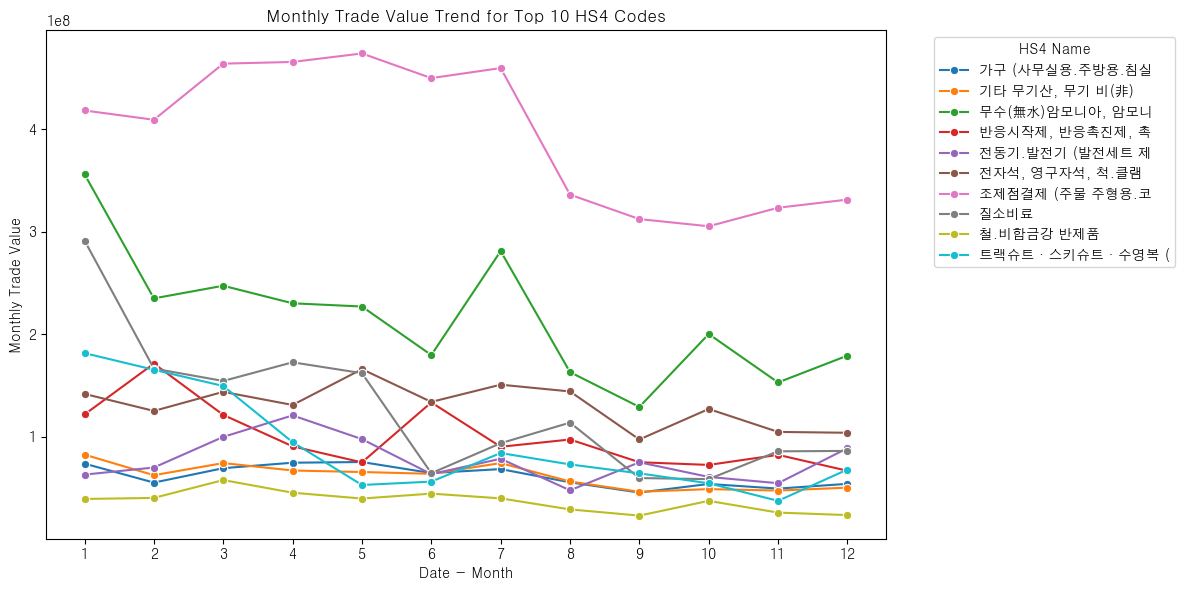

In [ ]:
# hs4_name_short 기준으로 상위 10개
top10_hs4 = hs4_summary.head(10).index.tolist()
print("Top 10 HS4 Names:", top10_hs4)

# hs4_name_short 만들기 (train에서도 동일하게 15자 제한)
hs4_code['hs4_name_short'] = (
    hs4_code['hs4_name'].fillna('Unknown HS4').astype(str).str.strip().str.slice(0, 15)
)

# Top10 HS4만 필터링
train_top10 = hs4_code[hs4_code['hs4_name_short'].isin(top10_hs4)]

# monthly_trend = (
#     train_top10.groupby(['year', 'month', 'hs4_name_short'])['value']
#     .sum()
#     .reset_index()
# )


monthly_trend = (
    train_top10.groupby(['month', 'hs4_name_short'])['value']
    .sum()
    .reset_index()
)

# year-month 합쳐서 datetime으로 변환하면 시각화 편함
monthly_trend['date_str'] = monthly_trend['month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='date_str', y='value', hue='hs4_name_short', marker='o')
plt.xlabel("Date - Month")
plt.ylabel("Monthly Trade Value")
plt.title("Monthly Trade Value Trend for Top 10 HS4 Codes")
plt.legend(title='HS4 Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Lowest 10 HS4 Codes by Trade Value

C:\Users\tj\AppData\Local\Temp\ipykernel_1864\635448440.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hs4_summary_top.values, y=hs4_summary_top.index, palette="magma")


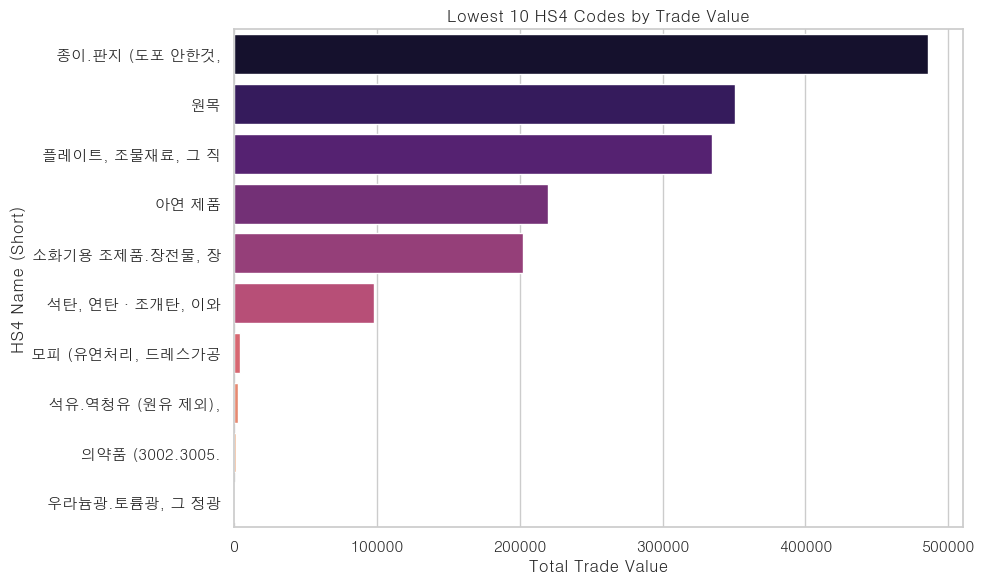

In [ ]:

# NaN 처리 + 최대 15자 자르기
hs4_code['hs4_name_short'] = (
    hs4_code['hs4_name']
    .fillna('Unknown HS4')
    .astype(str)
    .str.strip()
    .str.slice(0, 15)
)

hs4_summary = (
    hs4_code.groupby('hs4_name_short')['value']
    .sum()
    .sort_values(ascending=False)  # 내림차순
)

# plt.figure(figsize=(10, 8))
# sns.barplot(x=hs4_summary.values, y=hs4_summary.index, palette="viridis")
# plt.xlabel("Total Trade Value")
# plt.ylabel("HS4 Name (Short)")
# plt.title("Total Trade Value by HS4 Code")
# plt.tight_layout()
# plt.show()

top_n = 10
hs4_summary_top = hs4_summary.tail(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=hs4_summary_top.values, y=hs4_summary_top.index, palette="magma")
plt.xlabel("Total Trade Value")
plt.ylabel("HS4 Name (Short)")
plt.title(f"Lowest {top_n} HS4 Codes by Trade Value")
plt.tight_layout()
plt.show()

# top10 항목에 대한 월별 판매 추이


## Monthly Trade Value Trend for Lowest 10 HS4 Codes

Low 10 HS4 Names: ['종이.판지 (도포 안한것,', '원목', '플레이트, 조물재료, 그 직', '아연 제품', '소화기용 조제품.장전물, 장', '석탄, 연탄·조개탄, 이와', '모피 (유연처리, 드레스가공', '석유.역청유 (원유 제외),', '의약품 (3002.3005.', '우라늄광.토륨광, 그 정광']


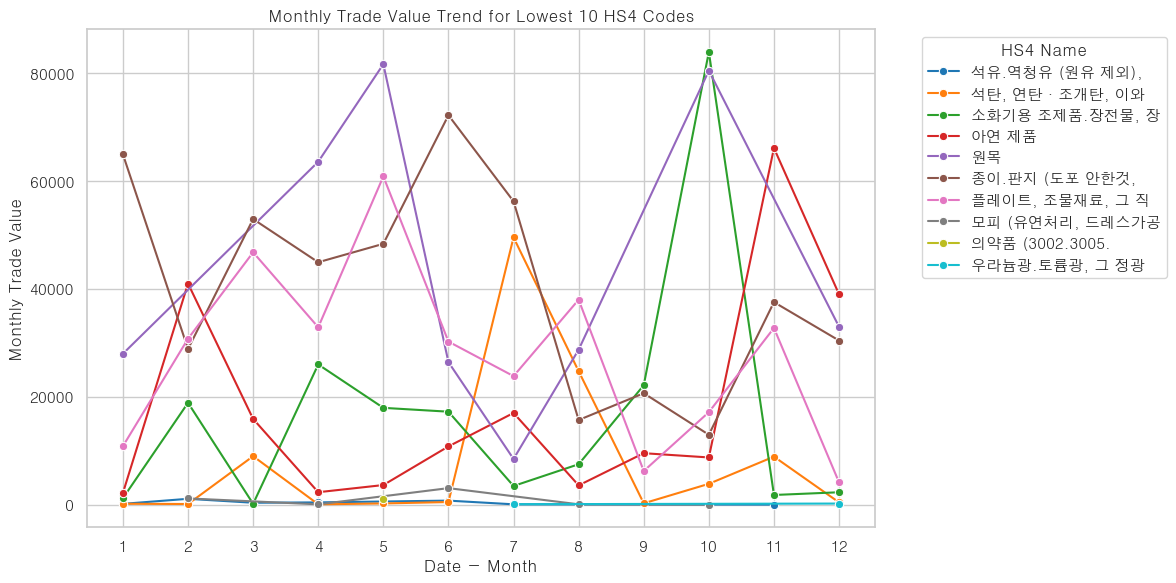

In [ ]:
# hs4_name_short 기준으로 하위 10개
low10_hs4 = hs4_summary.tail(10).index.tolist()
print("Low 10 HS4 Names:", low10_hs4)

# hs4_name_short 만들기 (train에서도 동일하게 15자 제한)
hs4_code['hs4_name_short'] = (
    hs4_code['hs4_name'].fillna('Unknown HS4').astype(str).str.strip().str.slice(0, 15)
)

# Top10 HS4만 필터링
train_low10 = hs4_code[hs4_code['hs4_name_short'].isin(low10_hs4)]

# monthly_trend = (
#     train_top10.groupby(['year', 'month', 'hs4_name_short'])['value']
#     .sum()
#     .reset_index()
# )


monthly_trend = (
    train_low10.groupby(['month', 'hs4_name_short'])['value']
    .sum()
    .reset_index()
)

# year-month 합쳐서 datetime으로 변환하면 시각화 편함
monthly_trend['date_str'] = monthly_trend['month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='date_str', y='value', hue='hs4_name_short', marker='o')
plt.xlabel("Date - Month")
plt.ylabel("Monthly Trade Value")
plt.title("Monthly Trade Value Trend for Lowest 10 HS4 Codes")
plt.legend(title='HS4 Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
